## LSTM Network - Prediction (model training)

The example below will build the LSTM model on the FTSE 100 up to today (2024-01-03) and split the training/validation. Then the prediction module will look ahead 300 days and try to make a  prediction based on a random generation. 

In [1]:
# Copyright 2020-2024 Jordi Corbilla. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

import os
import warnings
import secrets
import pandas as pd

from stock_prediction_class import StockPrediction
from stock_prediction_numpy import StockData
from stock_prediction_deep_learning import train_LSTM_network

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or '3' to suppress all messages

# Suppress other warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

2025-04-15 22:59:09.586640: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-15 22:59:09.633431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744738149.652104   89293 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744738149.656831   89293 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744738149.671824   89293 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Ticker: GOOG
Start Date: 2017-11-01
Validation Date: 2017-11-01
Test Run Folder: GOOG_20250415_0decf88d2b18a8bd3102378fd99d6b25
End Date: 2025-04-15


[*********************100%***********************]  1 of 1 completed


mean: [0.38400423]
max 0.9999999999999999
min 0.0
Std dev: [0.30469493]
plotting Data and Histogram


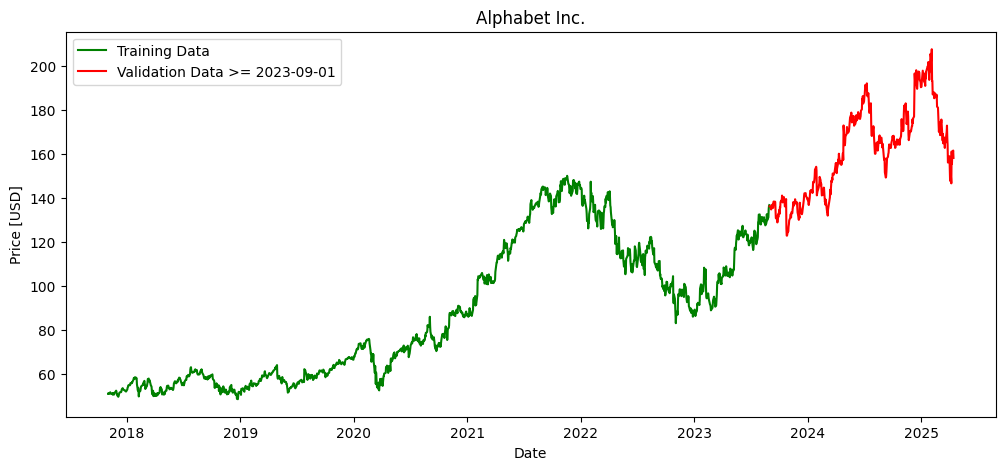

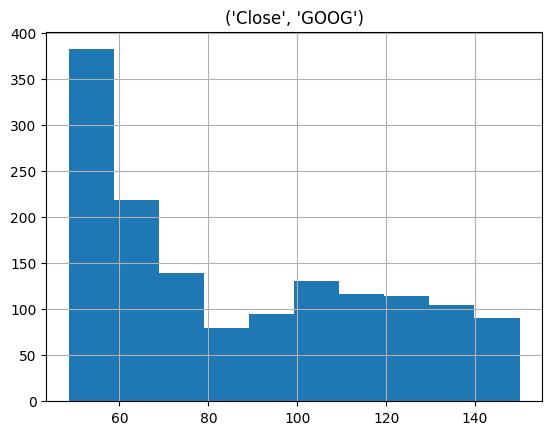

/home/jayagowtham/myenvs/.mlops/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 3, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 3, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - MSE: 0.0919 - loss: 0.0919 - val_MSE: 0.0303 - val_loss: 0.0303
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - MSE: 0.0114 - loss: 0.0114 - val_MSE: 0.0095 - val_loss: 0.0095
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MSE: 0.0076 - loss: 0.0076 - val_MSE: 0.0081 - val_loss: 0.0081
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MSE: 0.0079 - loss: 0.0079 - val_MSE: 0.0067 - val_loss: 0.0067
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MSE: 0.0073 - loss: 0.0073 - val_MSE: 0.0069 - val_loss: 0.0069
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MSE: 0.0063 - loss: 0.0063 - val_MSE: 0.0055 - val_loss: 0.0055
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MSE: 0.0055 - loss: 0.0055 - val_MSE: 0.0160 - val_loss: 0.0160
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - MSE: 0.0057 - loss: 0.0057 - val_MSE: 0.0290 - val_loss: 0.0290
Epoch 9/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step -

saving weights
plotting loss


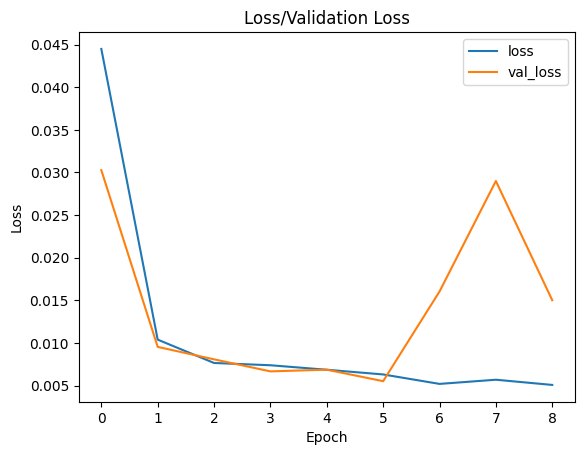

plotting MSE


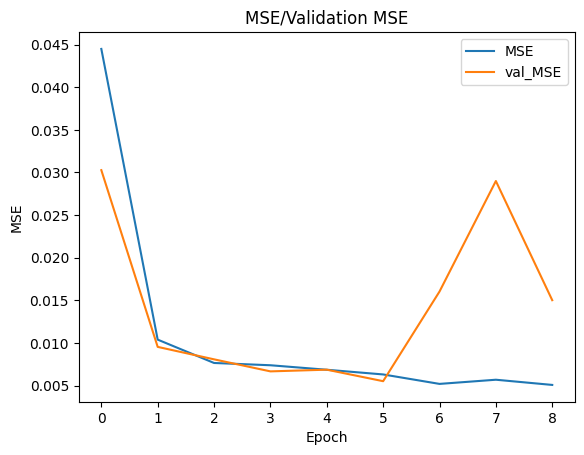

display the content of the model
13/13 - 0s - 6ms/step - MSE: 0.0150 - loss: 0.0150
loss :  0.01501308474689722
compile_metrics :  0.01501308474689722

plotting prediction results
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
plotting predictions


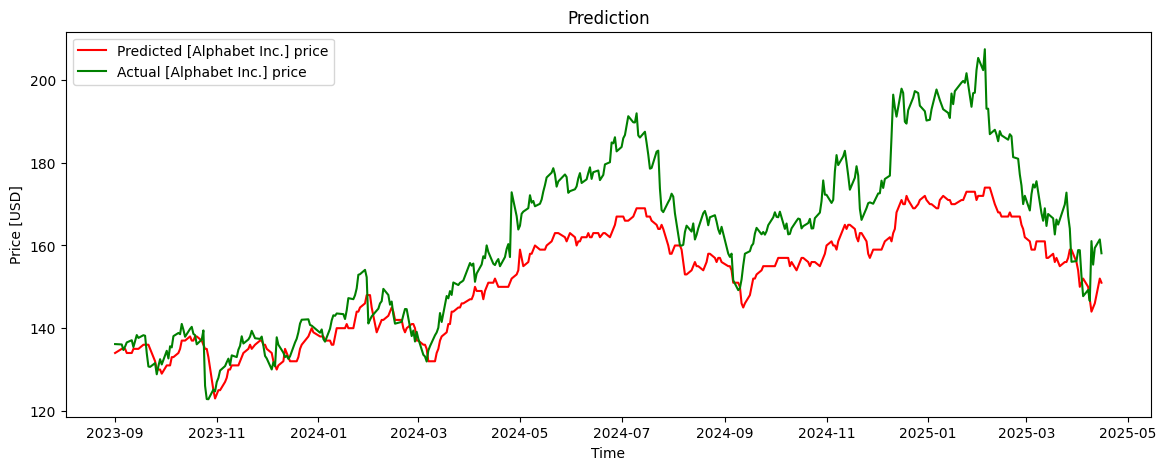

prediction is finished


In [4]:
STOCK_TICKER = "GOOG"
STOCK_START_DATE = pd.to_datetime("2017-11-01")
STOCK_VALIDATION_DATE = pd.to_datetime("2023-09-01")
EPOCHS =    10
BATCH_SIZE = 10
TIME_STEPS = 3
TODAY_RUN = datetime.today().strftime("%Y%m%d")
TOKEN = STOCK_TICKER + '_' + TODAY_RUN + '_' + secrets.token_hex(16)
GITHUB_URL = "https://github.com/JordiCorbilla/stock-prediction-deep-neural-learning/raw/master/"
print('Ticker: ' + STOCK_TICKER)
print('Start Date: ' + STOCK_START_DATE.strftime("%Y-%m-%d"))
print('Validation Date: ' + STOCK_START_DATE.strftime("%Y-%m-%d"))
print('Test Run Folder: ' + TOKEN)
# create project run folder
PROJECT_FOLDER = os.path.join(os.getcwd(), TOKEN)
if not os.path.exists(PROJECT_FOLDER):
    os.makedirs(PROJECT_FOLDER)

stock_prediction = StockPrediction(STOCK_TICKER, 
                                   STOCK_START_DATE, 
                                   STOCK_VALIDATION_DATE, 
                                   PROJECT_FOLDER, 
                                   GITHUB_URL,
                                   EPOCHS,
                                   TIME_STEPS,
                                   TOKEN,
                                   BATCH_SIZE)
# Execute Deep Learning model
train_LSTM_network(stock_prediction)

## Infer the Future Data (Predictions)

2.19.0
End Date: 2025-04-15


[*********************100%***********************]  1 of 1 completed


mean: [0.38129135]
max 1.0
min 0.0
Std dev: [0.30365625]
Latest Stock Price
158.25
Latest Date
2025-04-15 00:00:00
Future Date
2025-04-16 00:00:00
Future Timespan Date
2026-02-09 00:00:00


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 3, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 3, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,453 (435.37 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


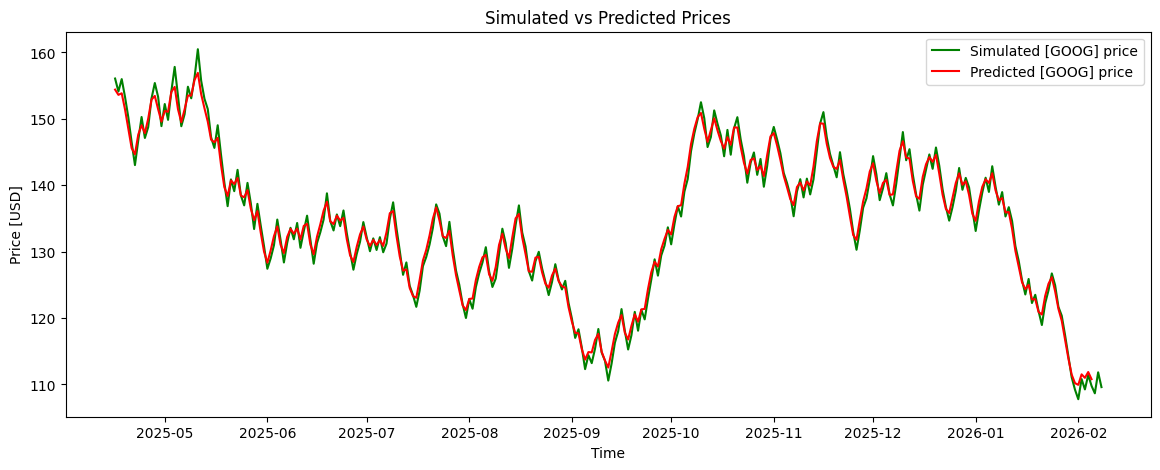

In [13]:
def infer_data():
    print(tf.version.VERSION)
    inference_folder = os.path.join(os.getcwd(), PROJECT_FOLDER)
    stock = StockPrediction(STOCK_TICKER, STOCK_START_DATE, STOCK_VALIDATION_DATE, inference_folder, GITHUB_URL, EPOCHS, TIME_STEPS, TOKEN, BATCH_SIZE)

    data = StockData(stock)

    (x_train, y_train), (x_test, y_test), (training_data, test_data) = data.download_transform_to_numpy(TIME_STEPS, inference_folder)
    min_max = data.get_min_max()

    # load future data
    print('Latest Stock Price')
    latest_close_price = test_data.Close.iloc[-1].item()
    # latest_date = test_data[-1:]['Close'].idxmin()
    latest_date = test_data.index[-1]
    print(latest_close_price)
    print('Latest Date')
    print(latest_date)

    tomorrow_date = latest_date + timedelta(1)
    # Specify the next 300 days
    next_year = latest_date + timedelta(TIME_STEPS * 100)

    print('Future Date')
    print(tomorrow_date)

    print('Future Timespan Date')
    print(next_year)

    x_test, y_test, test_data = data.generate_future_data(TIME_STEPS, min_max, tomorrow_date, next_year, latest_close_price)

    # Check if the future data is not empty
    if x_test.shape[0] > 0:
        # load the weights from our best model
        model = tf.keras.models.load_model(os.path.join(inference_folder, 'model_weights.h5'))
        model.summary()

        # perform a prediction
        test_predictions_baseline = model.predict(x_test)
        test_predictions_baseline = min_max.inverse_transform(test_predictions_baseline)
        test_predictions_baseline = pd.DataFrame(test_predictions_baseline, columns=['Predicted_Price'])

        # Combine the predicted values with dates from the test data
        predicted_dates = pd.date_range(start=test_data.index[0], periods=len(test_predictions_baseline))
        test_predictions_baseline['Date'] = predicted_dates
        
        # Reset the index for proper concatenation
        test_data.reset_index(inplace=True)
        
        # Concatenate the test_data and predicted data
        combined_data = pd.concat([test_data, test_predictions_baseline], ignore_index=True)
        
        # Plotting predictions
        plt.figure(figsize=(14, 5))
        plt.plot(combined_data['Date'], combined_data.Close, color='green', label='Simulated [' + STOCK_TICKER + '] price')
        plt.plot(combined_data['Date'], combined_data['Predicted_Price'], color='red', label='Predicted [' + STOCK_TICKER + '] price')
        plt.xlabel('Time')
        plt.ylabel('Price [USD]')
        plt.legend()
        plt.title('Simulated vs Predicted Prices')
        plt.savefig(os.path.join(inference_folder, STOCK_TICKER + '_future_comparison.png'))
        plt.show()
    else:
        print("Error: Future data is empty.")

start_date = pd.to_datetime('2017-01-01')
end_date = datetime.today()
duration = end_date - start_date
STOCK_VALIDATION_DATE = start_date + 0.8 * duration
infer_data()